In [ ]:
!pip install pycaret shap boto3 botocore explainerdashboard Autoviz

In [ ]:
import mlflow
import os
from getpass import getpass

os.environ['MLFLOW_TRACKING_USERNAME'] = input('Enter your DAGsHub username: ')
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('Enter your DAGsHub access token: ')
os.environ['MLFLOW_TRACKING_PROJECTNAME'] = input('Enter your DAGsHub project name: ')

mlflow.set_tracking_uri(f'https://dagshub.com/' + os.environ['MLFLOW_TRACKING_USERNAME'] 
                        + '/' + os.environ['MLFLOW_TRACKING_PROJECTNAME'] + '.mlflow')

Enter your DAGsHub username: juancamilogc93
Enter your DAGsHub access token: ··········
Enter your DAGsHub project name: Fraud


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df=pd.read_csv("data_done.csv")

In [2]:
df.columns

Index(['Unnamed: 0', 'genero', 'monto', 'fecha', 'hora', 'tipo_tc', 'linea_tc',
       'interes_tc', 'status_txn', 'is_prime', 'dcto', 'cashback', 'fraude',
       'device_score', 'dia'],
      dtype='object')

In [3]:
df.drop(['fecha'],axis=1 , inplace=True)

In [4]:
df = df.iloc[: , 1:]

In [5]:

x=df[['genero', 'monto', 'hora', 'tipo_tc', 'linea_tc', 'interes_tc', 'status_txn', 'is_prime', 'dcto', 'cashback','device_score', 'dia']]

y=df[['fraude']]


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=4, stratify=y)

In [7]:
print(f"No. of x_train examples: {x_train.shape[0]}")
print(f"No. of x_test examples: {x_test.shape[0]}")
print(f"No. of y_train examples: {y_train.shape[0]}")
print(f"No. of y_test examples: {y_test.shape[0]}")

No. of x_train examples: 24277
No. of x_test examples: 2698
No. of y_train examples: 24277
No. of y_test examples: 2698


In [8]:
x_train

,genero,monto,hora,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,device_score,dia
18559,F,313.650072,21,Virtual,31000,34,En proceso,True,0.000000,6.273001,5,Friday
24906,F,237.186633,6,FÃ­sica,86000,39,Aceptada,True,23.718663,2.134680,4,Friday
2484,F,616.255046,2,FÃ­sica,78000,41,Aceptada,False,0.000000,6.162550,5,Thursday
20016,M,897.192687,20,FÃ­sica,55000,32,Aceptada,False,0.000000,8.971927,2,Friday
9940,F,864.022335,1,FÃ­sica,28000,62,Aceptada,False,0.000000,8.640223,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
2759,M,399.145494,12,FÃ­sica,96000,58,Aceptada,False,0.000000,3.991455,3,Saturday
23042,F,669.414528,23,FÃ­sica,60000,59,Aceptada,False,0.000000,6.694145,3,Wednesday
14884,M,292.161651,5,FÃ­sica,34000,47,Aceptada,False,0.000000,2.921617,1,Saturday
3113,F,918.946035,7,Virtual,50000,52,Aceptada,False,91.894603,16.541029,1,Thursday


In [9]:
y_train.describe()

,fraude
count,24277
unique,2
top,False
freq,23548


In [10]:
y_train.fraude.value_counts().unique()

array([23548,   729], dtype=int64)

In [11]:
y_test .fraude.value_counts().unique()

array([2617,   81], dtype=int64)

In [12]:
from pycaret.classification import *


In [13]:
#from imblearn.over_sampling import *
#adasyn1 = ADASYN(sampling_strategy='minority')

In [14]:
data = pd.concat([x_train, y_train], axis=1)
test= pd.concat([x_test, y_test ], axis=1)

fix_imbalance: bool, default = False
    When training dataset has unequal distribution of target class it can be balanced
using this parameter. When set to True, SMOTE (Synthetic Minority Over-sampling
Technique) is applied by default to create synthetic datapoints for minority class.

fix_imbalance_method: obj, default = None
    When fix_imbalance is True, 'imblearn' compatible object with 'fit_resample'
method can be passed. When set to None, 'imblearn.over_sampling.SMOTE' is used.


In [15]:
s = setup(data = data , target = 'fraude' ,
          session_id=125,fix_imbalance=True ,log_experiment=True
         # ,log_plots=True 
          , experiment_name = 'SMOTE')

,Description,Value
0,session_id,125
1,Target,fraude
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(24277, 13)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
#%matplotlib inline
#eda(display_format = 'bokeh')

In [17]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9706,0.4829,0.0000,0.0000,0.0000,0.0000,0.0000,0.9820
gbc,Gradient Boosting Classifier,0.9706,0.5177,0.0000,0.0000,0.0000,0.0000,0.0000,2.8150
lightgbm,Light Gradient Boosting Machine,0.9706,0.4914,0.0000,0.0000,0.0000,-0.0001,-0.0004,0.8270
dummy,Dummy Classifier,0.9706,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2120
rf,Random Forest Classifier,0.9705,0.4800,0.0000,0.0000,0.0000,-0.0003,-0.0010,1.2560
et,Extra Trees Classifier,0.9690,0.5098,0.0000,0.0000,0.0000,-0.0030,-0.0066,1.3490
dt,Decision Tree Classifier,0.9348,0.4903,0.0180,0.0146,0.0161,-0.0171,-0.0172,0.6550
knn,K Neighbors Classifier,0.6896,0.5038,0.3127,0.0306,0.0557,0.0023,0.0049,9.1930
lr,Logistic Regression,0.5591,0.4999,0.4371,0.0295,0.0553,0.0003,-0.0000,4.0150
ridge,Ridge Classifier,0.5414,0.0000,0.4491,0.0289,0.0543,-0.0010,-0.0023,0.4900


In [ ]:
#best = compare_models(include = ['lr', 'dt'])

In [18]:
print(best)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=125)


Here you can interact with the different plots

In [19]:
#evaluate_model(best)

In [20]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9706,0.4665,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9706,0.4998,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9706,0.4910,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9712,0.4599,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9706,0.4514,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9706,0.5335,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9706,0.4827,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9700,0.4826,0.0000,0.0000,0.0000,-0.0012,-0.0042
8,0.9706,0.5134,0.0000,0.0000,0.0000,0.0000,0.0000


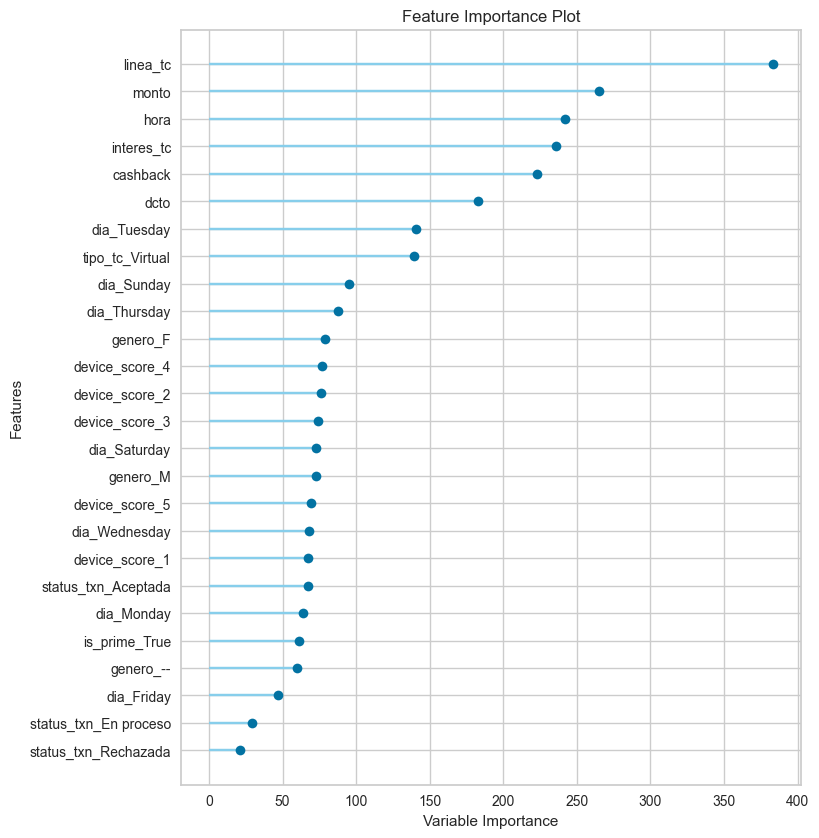

In [21]:
plot_model(lightgbm, plot = 'feature_all')

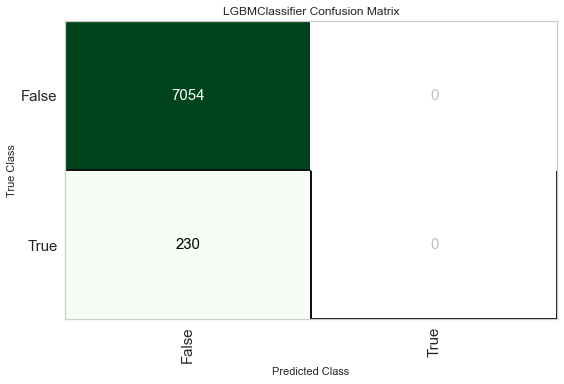

In [24]:
plot_model(lightgbm, plot = 'confusion_matrix')

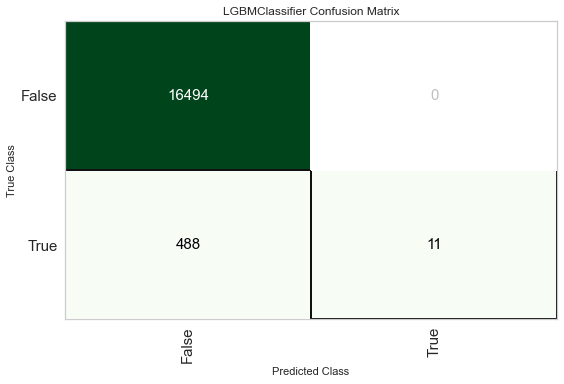

In [35]:
plot_model(lightgbm, plot = 'confusion_matrix', use_train_data = True)

# # Most important features


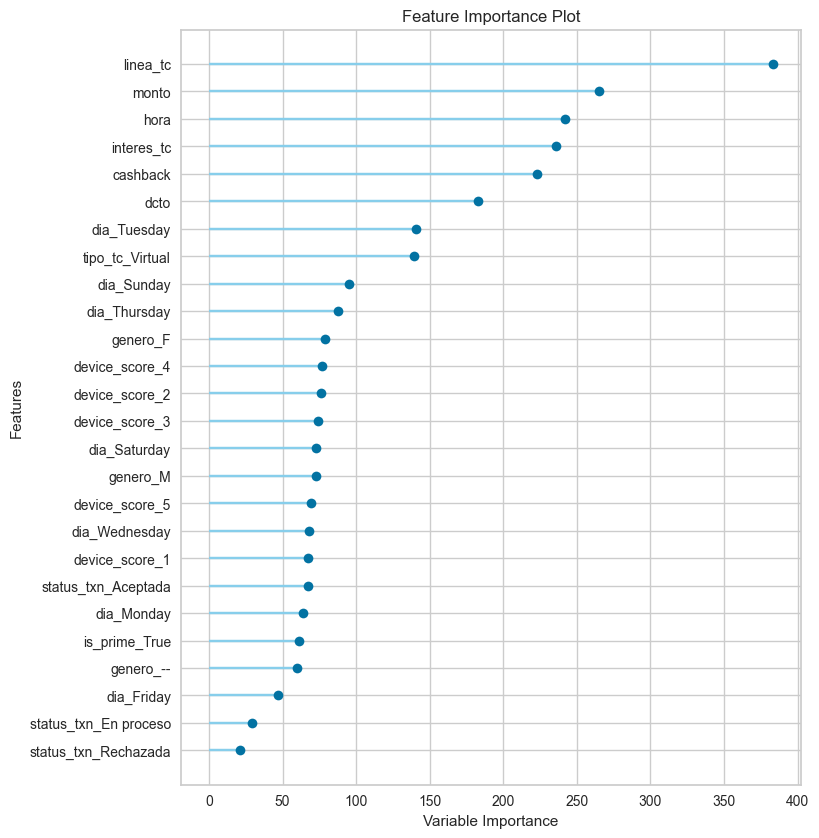

In [23]:
plot_model(lightgbm, plot = 'feature_all', use_train_data = True)

In [25]:
predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9684,0.4645,0.0000,0.0000,0.0000,0.0000,0.0000


,monto,hora,linea_tc,interes_tc,dcto,cashback,genero_--,genero_F,genero_M,tipo_tc_Virtual,...,dia_Friday,dia_Monday,dia_Saturday,dia_Sunday,dia_Thursday,dia_Tuesday,dia_Wednesday,fraude,Label,Score
0,834.115051,3.0,86000.0,32.0,83.411507,7.507036,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,0.9762
1,863.358276,3.0,76000.0,59.0,0.000000,8.633583,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,0.9795
2,620.606750,20.0,62000.0,47.0,62.060677,5.585461,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,False,False,0.9625
3,61.638680,19.0,95000.0,52.0,0.000000,0.616387,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,0.9713
4,722.301575,7.0,84000.0,57.0,0.000000,14.446032,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,False,0.9846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,135.330261,13.0,55000.0,54.0,0.000000,2.706605,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,False,False,0.8961
7280,312.042358,8.0,43000.0,35.0,0.000000,3.120424,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,False,0.9268
7281,176.774658,3.0,99000.0,39.0,17.677467,1.590972,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,False,0.9128
7282,295.283722,5.0,51000.0,40.0,29.528374,2.657554,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,0.9372


In [26]:
test=predict_model(lightgbm, data=test)
test

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9700,0.4982,0.0000,0.0000,0.0000,0.0000,0.0000


,genero,monto,hora,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,device_score,dia,fraude,Label,Score
12044,M,174.038080,20,FÃ­sica,93000,38,Rechazada,False,17.403808,1.566343,1,Wednesday,False,False,0.9791
20743,F,263.450832,23,FÃ­sica,91000,57,En proceso,False,0.000000,2.634508,3,Friday,False,False,0.9767
18393,F,133.633282,7,FÃ­sica,55000,43,Aceptada,False,0.000000,1.336333,2,Tuesday,False,False,0.9550
20227,M,486.849765,8,Virtual,26000,60,Aceptada,True,97.369953,7.789596,5,Sunday,False,False,0.9875
12903,M,656.994053,22,FÃ­sica,60000,63,Aceptada,False,65.699405,5.912946,4,Friday,False,False,0.9690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,F,753.861287,5,Virtual,73000,57,Aceptada,False,0.000000,15.077226,4,Monday,False,False,0.9839
8279,F,842.727114,6,Virtual,46000,49,Rechazada,False,0.000000,16.854542,2,Monday,False,False,0.9679
17099,M,61.351536,16,FÃ­sica,25000,60,Aceptada,False,12.270307,0.490812,5,Friday,False,False,0.9885
21686,M,707.558980,3,FÃ­sica,33000,59,Rechazada,True,0.000000,7.075590,3,Sunday,False,False,0.9832


In [27]:
test['Label'] = test['Label'].astype(bool)

In [28]:
test['Score_Label'] = np.where(test['Score'] >= 0.5, False, True)

In [29]:
test

,genero,monto,hora,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,device_score,dia,fraude,Label,Score,Score_Label
12044,M,174.038080,20,FÃ­sica,93000,38,Rechazada,False,17.403808,1.566343,1,Wednesday,False,True,0.9791,False
20743,F,263.450832,23,FÃ­sica,91000,57,En proceso,False,0.000000,2.634508,3,Friday,False,True,0.9767,False
18393,F,133.633282,7,FÃ­sica,55000,43,Aceptada,False,0.000000,1.336333,2,Tuesday,False,True,0.9550,False
20227,M,486.849765,8,Virtual,26000,60,Aceptada,True,97.369953,7.789596,5,Sunday,False,True,0.9875,False
12903,M,656.994053,22,FÃ­sica,60000,63,Aceptada,False,65.699405,5.912946,4,Friday,False,True,0.9690,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,F,753.861287,5,Virtual,73000,57,Aceptada,False,0.000000,15.077226,4,Monday,False,True,0.9839,False
8279,F,842.727114,6,Virtual,46000,49,Rechazada,False,0.000000,16.854542,2,Monday,False,True,0.9679,False
17099,M,61.351536,16,FÃ­sica,25000,60,Aceptada,False,12.270307,0.490812,5,Friday,False,True,0.9885,False
21686,M,707.558980,3,FÃ­sica,33000,59,Rechazada,True,0.000000,7.075590,3,Sunday,False,True,0.9832,False


In [31]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test['Label'], test['Score_Label'])

print(cf_matrix)

[[   0    0]
 [2698    0]]


# #  Model interpretation

### Although the plot showed Hora as the third most important variable, apparently when evaluating the prediction of all the values in the dataset, it has a higher impact. 

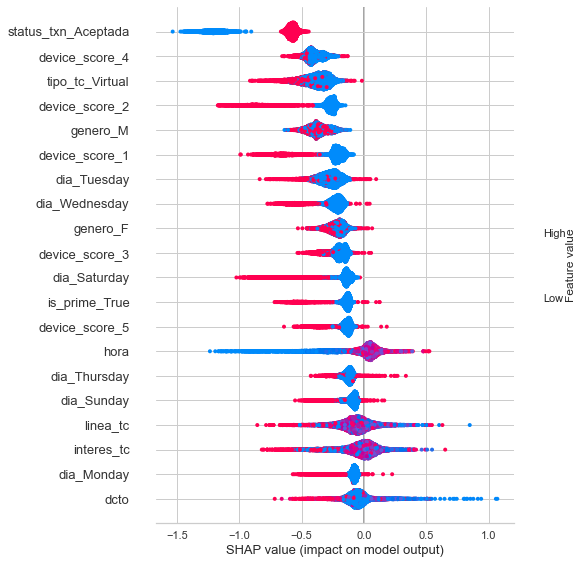

In [32]:
interpret_model(lightgbm)

In [43]:
finalize_model(lightgbm)
#Train the model without split data.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=125, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [44]:
save_config('my_config')

In [ ]:
#deploy_model(dt, model_name = 'dt', platform = 'aws', authentication = { 'bucket'  : 'fraud-challenge' })

In [ ]:
save_model(ada, 'lightgbm_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='fraude',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('dummy', Dummify(target='fraude')),
                 ('fix_perfect', Remove_100(target='fraude')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('d

In [ ]:
import boto3

#Creating Session With Boto3.
session = boto3.Session(
aws_access_key_id='xxxxxxxxxxxx',
aws_secret_access_key='xxxxxxxxxx'
)

#Creating S3 Resource From the Session.
s3 = session.resource('s3')

object = s3.Object('xxxxxxx', 'lightgbm_pipeline.pkl')

result = object.put(Body=open('lightgbm_pipeline.pkl', 'rb'))

res = result.get('ResponseMetadata')

if res.get('HTTPStatusCode') == 200:
    print('File Uploaded Successfully')
else:
    print('File Not Uploaded')





In [ ]:
training_data.iloc[: :]

In [ ]:
training_data.info()